## 【問題1】データの取得



In [4]:
from sklearn.datasets import load_iris
import pandas as pd
# import sklearn.datasets

iris = load_iris()

# store feature_names matrix in "X"
X = pd.DataFrame(iris.data, columns=iris.feature_names)

# store iris.target vector in "y"
y = pd.DataFrame(iris.target, columns=["Species"])

# print(X)
# print(y)

## 【問題2】データの結合

問題1で準備したX,yを結合させたDataFrame型変数dfを作成してください。結合することで扱いやすくなります。これ以降はこのdfを使っていきます。

In [5]:
df = pd.concat([X, y.reindex(X.index)], axis=1)
# reindex meaningless

df

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),Species
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,2
146,6.3,2.5,5.0,1.9,2
147,6.5,3.0,5.2,2.0,2
148,6.2,3.4,5.4,2.3,2


## 【問題3】データの確認

今回扱うデータがどのようなものなのかを確認します。以下の4つを行ってください。

* 先頭から4番目までのサンプルを表示させ、各特徴量がどういったものかを見る。（数値データか文字データかなど）
* ラベルごとのサンプル数の合計を出力する。
* 特徴量に欠損値があるかを確認する。
* 特徴量の平均値と標準偏差、四分位数を一度に表示させる。

In [6]:
# 先頭から4番目までのサンプルを表示させ、各特徴量がどういったものかを見る。
print("先頭から4番目までのサンプルは以下の通り。")

df.head()

先頭から4番目までのサンプルは以下の通り。


,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),Species
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0


In [7]:
print("各特徴量は以下の通り。")
df.info()

各特徴量は以下の通り。
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   sepal length (cm)  150 non-null    float64
 1   sepal width (cm)   150 non-null    float64
 2   petal length (cm)  150 non-null    float64
 3   petal width (cm)   150 non-null    float64
 4   Species            150 non-null    int32  
dtypes: float64(4), int32(1)
memory usage: 5.4 KB


In [8]:
df.describe()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),Species
count,150.000000,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.057333,3.758000,1.199333,1.000000
std,0.828066,0.435866,1.765298,0.762238,0.819232
min,4.300000,2.000000,1.000000,0.100000,0.000000
25%,5.100000,2.800000,1.600000,0.300000,0.000000
50%,5.800000,3.000000,4.350000,1.300000,1.000000
75%,6.400000,3.300000,5.100000,1.800000,2.000000
max,7.900000,4.400000,6.900000,2.500000,2.000000


In [9]:
# ラベルごとのサンプル数の合計を出力する。
df_species = df['Species']

df_setosa_total_count = (df_species == 0).sum()
df_virgicolor_total_count = (df_species == 1).sum()
df_virginica_total_count = (df_species == 2).sum()


number_of_each_row = "setosa: {}".format(df_setosa_total_count), "virgicolor: {}".format(df_virgicolor_total_count), "virginica: {}".format(df_virginica_total_count)


print("ラベルごとのサンプル数の合計は以下の通り。\n{}".format(number_of_each_row))

ラベルごとのサンプル数の合計は以下の通り。
('setosa: 50', 'virgicolor: 50', 'virginica: 50')


In [10]:
# 特徴量に欠損値があるかを確認する。
check_null = df.isnull()
row_has_null = check_null.any(axis=0)
## use .sum(axis=0) instead


# 全ての特徴量の欠損地を確認する。
# print(check_na)

# 各列に欠損値があれば True.
print("特徴量に欠損値があるかを確認する。")
row_has_null

特徴量に欠損値があるかを確認する。


sepal length (cm)    False
sepal width (cm)     False
petal length (cm)    False
petal width (cm)     False
Species              False
dtype: bool

In [11]:
## 特徴量の平均値と標準偏差、四分位数を一度に表示させる。##

# 各項目ごとに表示する場合は以下の通り。
# mean_value = df.mean()
# std_value = df.std()
# quantile_value = df.quantile()
# print("平均値\n{}".format(mean_value), "\n\n標準偏差\n{}".format(std_value), "\n\n四分位数\n{}".format(quantile_value))

# 一度に表示する場合は以下の通り。
df.describe()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),Species
count,150.000000,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.057333,3.758000,1.199333,1.000000
std,0.828066,0.435866,1.765298,0.762238,0.819232
min,4.300000,2.000000,1.000000,0.100000,0.000000
25%,5.100000,2.800000,1.600000,0.300000,0.000000
50%,5.800000,3.000000,4.350000,1.300000,1.000000
75%,6.400000,3.300000,5.100000,1.800000,2.000000
max,7.900000,4.400000,6.900000,2.500000,2.000000


## 【問題4】irisデータセット自体の調査

ページのはじめで「カナダのガスペ半島のある牧草地で」と書きましたが、データセット自体についてもう少し調査しておきましょう。データセットを見る上で、そのデータセット自体について知っておくことも大切です。

## Iris plants dataset

概要：
* Sir R.A. Fisher執筆のFisher's paperより抜粋したデータベース。
* カナダのガスペ半島のある牧草地にて、アヤメ科の３品種（Species）を50サンプルずつ採取。
* 各サンプルの萼（sepal）と花弁（petal）の長さ（length）と厚み（width）を計測。

採取者：Sir R.A. Fisher   
採取日：July, 1988   
対象品種：   
* Iris setosa（品種番号0）   
* Iris virgicolor（品種番号1）   
* Iris virginica（品種番号2）   
    
サンプル数：150（3品種 x 50）   
計測対象：4項目（萼と花弁の長さと厚み。(cm)）

## 【問題5】必要なデータを抽出

DataFrameから必要なデータを抽出する方法を確認していきます。以下を行ってください。

* sepal_widthの列を３つの異なる方法で抽出する
 * 50番目から99番目までのデータを抽出する
* petal_lengthの列の50番目から99番目までのデータを抽出する
* petal_widthの値が0.2のデータを抽出する

locや.ilocを使うことになります。この２つはどう違うのかについて説明してください。

In [12]:
# 列名指定、列名をメソッドで、loc, iloc

print("50-99番目までのデータ(virgiclor)を抽出する")
print("\nその1（locを用いた方法）\n")
print(df.loc[50:99, 'sepal width (cm)'])

print("\nその2（ilocを用いた方法）\n")
print(df.iloc[50:99, 1])

print("\nその3（インデックスのみを用いた方法）\n")
print(df['sepal width (cm)'][50:100])


print("\npetal_lengthの列の50番目から99番目までのデータを抽出する。")
print(df.loc[50:99, 'petal length (cm)'])

print("\npetal_widthの値が0.2のデータを抽出する。")
# print(df['petal width (cm)'].isin([0.2]))
df_petal_width = df['petal width (cm)']
print("petal_widthが0.2cmの合計サンプル数は{}である。".format((df_petal_width == 0.2).sum()))

print("\n【loc / ilocの違い】\nlocは指定したラベル名に基づいて行を返す。\nilocは指定した数字を行列内のインデックス数として、その中身を返す。")

50-99番目までのデータ(virgiclor)を抽出する

その1（locを用いた方法）

50    3.2
51    3.2
52    3.1
53    2.3
54    2.8
55    2.8
56    3.3
57    2.4
58    2.9
59    2.7
60    2.0
61    3.0
62    2.2
63    2.9
64    2.9
65    3.1
66    3.0
67    2.7
68    2.2
69    2.5
70    3.2
71    2.8
72    2.5
73    2.8
74    2.9
75    3.0
76    2.8
77    3.0
78    2.9
79    2.6
80    2.4
81    2.4
82    2.7
83    2.7
84    3.0
85    3.4
86    3.1
87    2.3
88    3.0
89    2.5
90    2.6
91    3.0
92    2.6
93    2.3
94    2.7
95    3.0
96    2.9
97    2.9
98    2.5
99    2.8
Name: sepal width (cm), dtype: float64

その2（ilocを用いた方法）

50    3.2
51    3.2
52    3.1
53    2.3
54    2.8
55    2.8
56    3.3
57    2.4
58    2.9
59    2.7
60    2.0
61    3.0
62    2.2
63    2.9
64    2.9
65    3.1
66    3.0
67    2.7
68    2.2
69    2.5
70    3.2
71    2.8
72    2.5
73    2.8
74    2.9
75    3.0
76    2.8
77    3.0
78    2.9
79    2.6
80    2.4
81    2.4
82    2.7
83    2.7
84    3.0
85    3.4
86    3.1
87    2.3
88    3.0
89    

## 【問題6】図の作成

データは可視化して確認することが大切です。次の3つを行ってください。作図のライブラリはMatplotlibの他seabornもよく使われます。

* ラベルごとのサンプル数を円グラフにする（パーセンテージまで表示する）
* 特徴量を一つずつ選び、箱ひげ図を使ってラベルごとのデータの分布を可視化する
* 特徴量を一つずつ選び、バイオリン図を使ってラベルごとのデータの分布を可視化する

箱ひげ図とバイオリン図は似た図を表示します。これらはどう違い、それぞれどのような利点があるのかについて説明してください。

ラベルごとのサンプル数を円グラフにする（パーセンテージまで表示する）


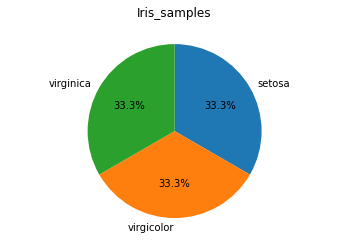

In [13]:
import matplotlib.pyplot as plt
%matplotlib inline

print('ラベルごとのサンプル数を円グラフにする（パーセンテージまで表示する）')

# 各ラベルの４要素のみを抽出。
# 5列目（Speciees）から"0", "1", "2"の値をもつ行をそれぞれ抽出する。

df_setosa = df[df['Species'].isin([0])]
df_virgicolor = df[df['Species'].isin([1])]
df_virginica = df[df['Species'].isin([2])]

# 3品種の合計サンプル数を求めて、それをyとした円グラフを生成する。
df_setosa_total = df_setosa.sum()

df_setosa_total = (df_species == 0).sum()
df_virgicolor_total = (df_species == 1).sum()
df_virginica_total = (df_species == 2).sum()

df_total = [df_setosa_total, df_virgicolor_total, df_virginica_total]

x = df_total

plt.axis('equal')
plt.title('Iris_samples')
label = ["setosa", "virgicolor", "virginica"]

plt.pie(x, labels=label, counterclock=False, startangle=90, autopct="%1.1f%%")
plt.show()

特徴量を一つずつ選び、箱ひげ図を使ってラベルごとのデータの分布を可視化する


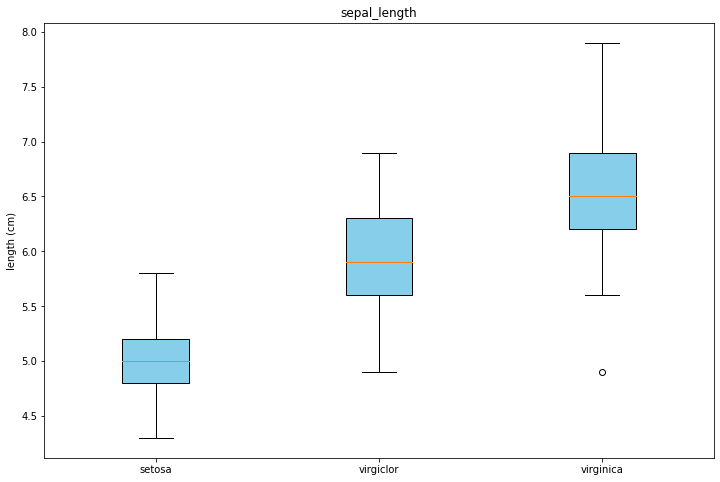

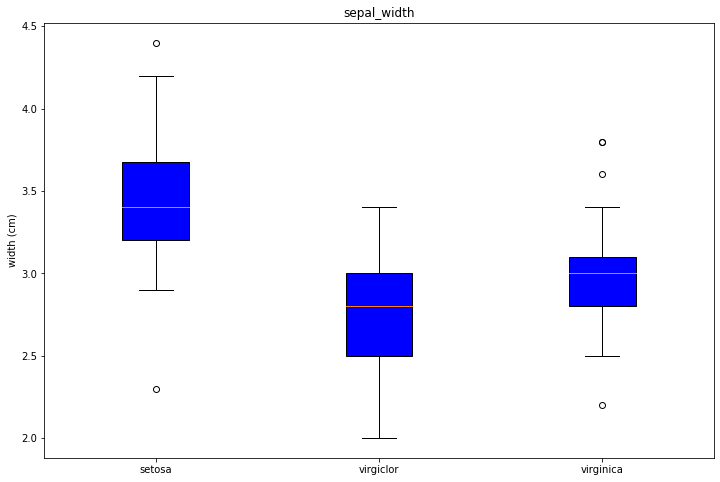

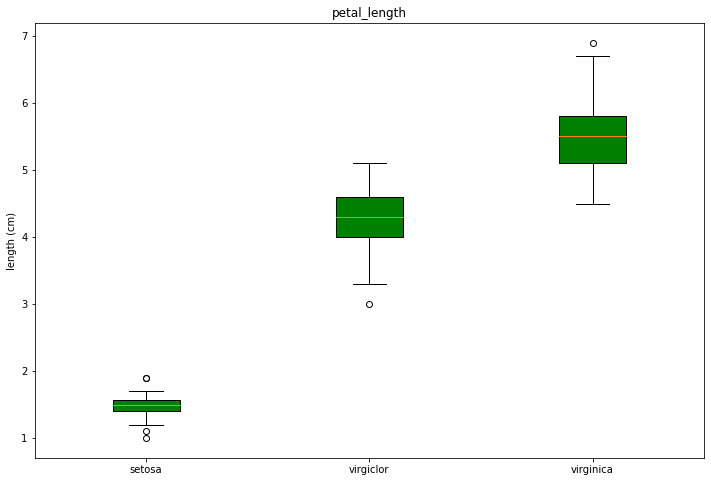

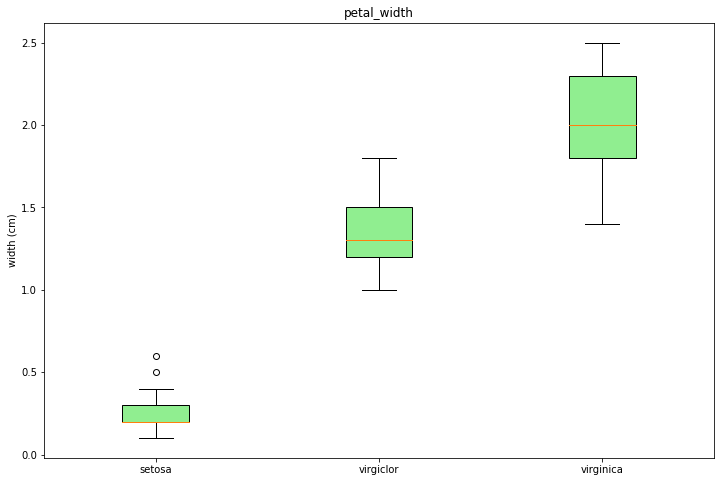

In [14]:
import matplotlib.pyplot as plt
%matplotlib inline
# 参照サイト：https://hira03.hatenablog.com/entry/statistics_box_plot

print('特徴量を一つずつ選び、箱ひげ図を使ってラベルごとのデータの分布を可視化する')

# ４要素を単独のリストとして、ilocを用いて各ラベルごと取り出す。
# setosa
setosa_sepal_length = df.iloc[0:50, 0]
setosa_sepal_width = df.iloc[0:50, 1]
setosa_petal_length = df.iloc[0:50, 2]
setosa_petal_width = df.iloc[0:50, 3]

# virgiclor
virgiclor_sepal_length = df.iloc[51:100, 0]
virgiclor_sepal_width = df.iloc[51:100, 1]
virgiclor_petal_length = df.iloc[51:100, 2]
virgiclor_petal_width = df.iloc[51:100, 3]

# virginica
virginica_sepal_length = df.iloc[101:150,0]
virginica_sepal_width = df.iloc[101:150,1]
virginica_petal_length = df.iloc[101:150,2]
virginica_petal_width = df.iloc[101:150,3]

# 各ラベルごとの４要素を１Tupleに格納して、boxplot化する。
setosa_data = (setosa_sepal_length, setosa_sepal_width, setosa_petal_length, setosa_petal_width)
virgiclor_data = (virgiclor_sepal_length, virgiclor_sepal_width, virgiclor_petal_length, virgiclor_petal_width)
virginica_data = (virginica_sepal_length, virginica_sepal_width, virginica_petal_length, virginica_petal_width)

# ４要素ごとでリスト化
sepal_length = (setosa_data[0], virgiclor_data[0], virginica_data[0])
sepal_width = (setosa_data[1], virgiclor_data[1], virginica_data[1])
petal_length = (setosa_data[2], virgiclor_data[2], virginica_data[2])
petal_width = (setosa_data[3], virgiclor_data[3], virginica_data[3])

# sepal_lengthの箱ひげ化
fig, axes = plt.subplots(figsize = (12, 8))
plt.boxplot(sepal_length, patch_artist=True, boxprops=dict(facecolor='skyblue', color='black', linewidth=1))
axes.set_xticklabels(['setosa', 'virgiclor', 'virginica'])

plt.title('sepal_length')
plt.ylabel('length (cm)')
plt.show()

# sepal_widthの箱ひげ化
fig, axes = plt.subplots(figsize = (12, 8))
plt.boxplot(sepal_width, patch_artist=True, boxprops=dict(facecolor='blue', color='black', linewidth=1))
axes.set_xticklabels(['setosa', 'virgiclor', 'virginica'])

plt.title('sepal_width')
plt.ylabel('width (cm)')
plt.show()

# petal_lengthの箱ひげ化
fig, axes = plt.subplots(figsize = (12, 8))
plt.boxplot(petal_length, patch_artist=True, boxprops=dict(facecolor='green', color='black', linewidth=1))
axes.set_xticklabels(['setosa', 'virgiclor', 'virginica'])

plt.title('petal_length')
plt.ylabel('length (cm)')
plt.show()

# petal_widthの箱ひげ化
fig, axes = plt.subplots(figsize = (12, 8))
plt.boxplot(petal_width, patch_artist=True, boxprops=dict(facecolor='lightgreen', color='black', linewidth=1))
axes.set_xticklabels(['setosa', 'virgiclor', 'virginica'])

plt.title('petal_width')
plt.ylabel('width (cm)')
plt.show()

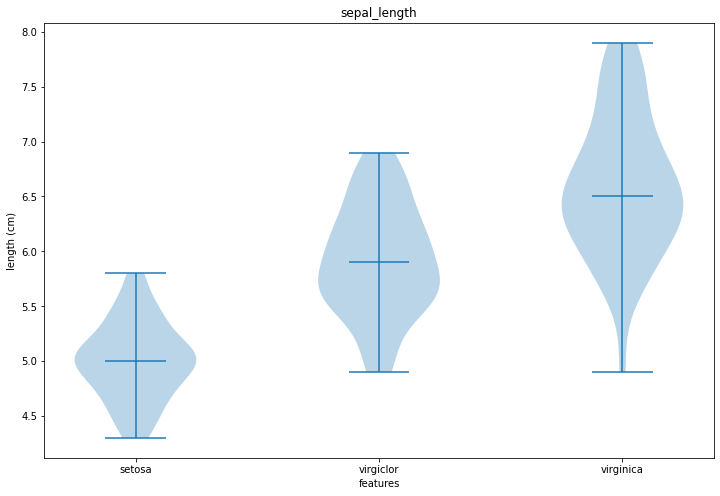

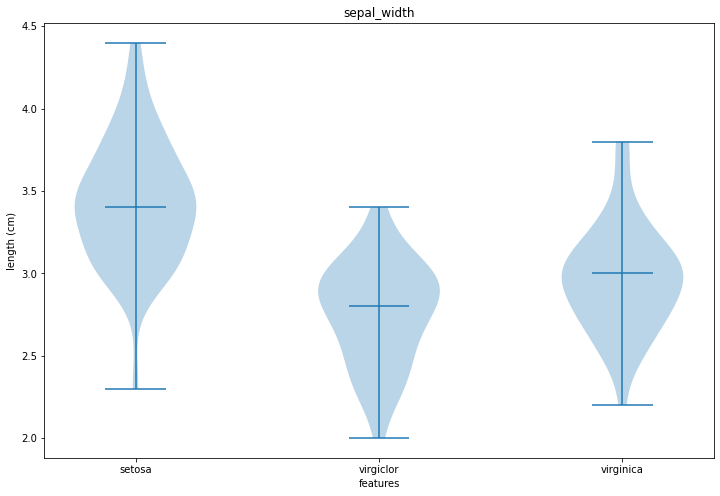

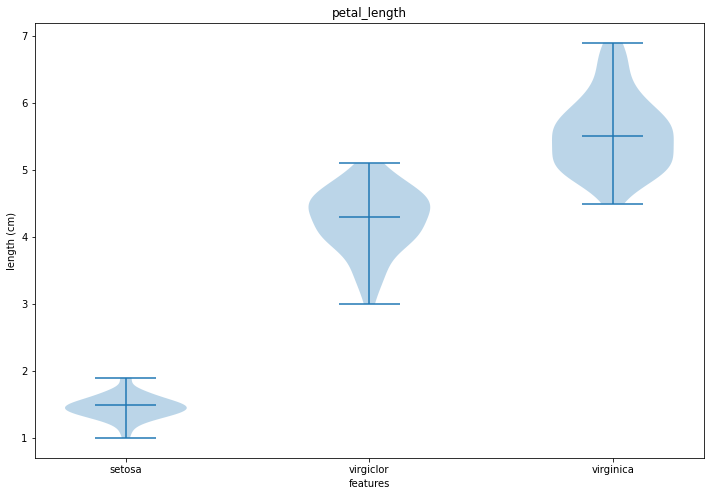

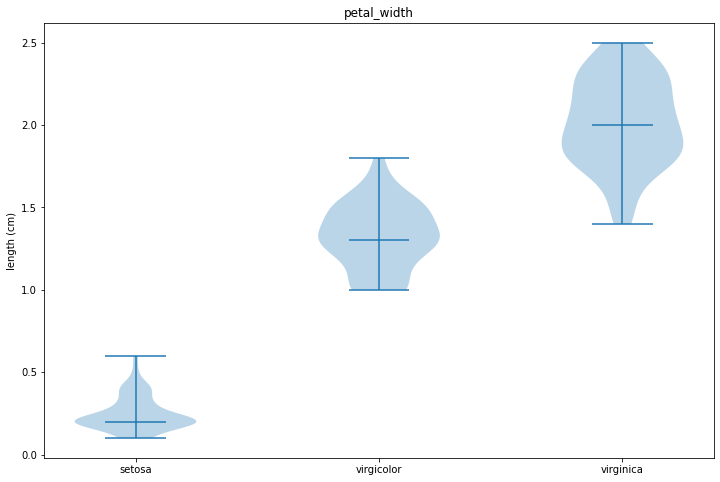

In [64]:
import matplotlib.pyplot as plt
%matplotlib inline

# 特徴量を一つずつ選び、バイオリン図を使ってラベルごとのデータの分布を可視化する。

# 4要素ごとのリストを上記セルか再度引用する。
sepal_length = (setosa_data[0], virgiclor_data[0], virginica_data[0])
sepal_width = (setosa_data[1], virgiclor_data[1], virginica_data[1])
petal_length = (setosa_data[2], virgiclor_data[2], virginica_data[2])
petal_width = (setosa_data[3], virgiclor_data[3], virginica_data[3])

# 各4要素をviolinplot化する。
fig, axes = plt.subplots(figsize = (12, 8))

axes.set_xticks([1, 2, 3])
axes.set_xticklabels(['setosa', 'virgiclor', 'virginica'])
plt.title('sepal_length')
plt.xlabel('features')
plt.ylabel('length (cm)')

plt.violinplot(sepal_length, showmedians=True)
plt.show()

# sepal_width
fig, axes = plt.subplots(figsize = (12, 8))

axes.set_xticks([1, 2, 3])
axes.set_xticklabels(['setosa', 'virgiclor', 'virginica'])
plt.title('sepal_width')
plt.xlabel('features')
plt.ylabel('length (cm)')

plt.violinplot(sepal_width, showmedians=True)
plt.show()

# petal_length
fig, axes = plt.subplots(figsize = (12, 8))

axes.set_xticks([1, 2, 3])
axes.set_xticklabels(['setosa', 'virgiclor', 'virginica'])
plt.title('petal_length')
plt.xlabel('features')
plt.ylabel('length (cm)')

plt.violinplot(petal_length, showmedians=True)
plt.show()

# petal_width
fig, axes = plt.subplots(figsize = (12, 8))

axes.set_xticks([1, 2, 3])
axes.set_xticklabels(['setosa', 'virgicolor', 'virginica'])
plt.title('petal_width')
# plt.xlabel('features')
plt.ylabel('length (cm)')

plt.violinplot(petal_width, showmedians=True)
plt.show()

【考察】   

箱ひげ図と比較して、バイオリン図は分布が視覚的に理解しやすい。
ただし、カーネル密度推定プロットの影響で、実際よりも滑らかに描写されているため、データが存在しない範囲にもあたかも存在しているかのように見えてしまう、特徴的な欠点がある。

## 【問題7】特徴量間の関係の確認

特徴量間の関係を見ていきます。次の4つを行ってください。


* 縦軸と横軸に特徴量を１つずつ取り、種類毎に色分けした散布図を作る
* 全ての組み合わせの散布図を一度に表示させる、散布図行列を作る
* ４つの特徴量に関する相関係数行列を作る
* 相関係数行列のヒートマップを作る

相関係数行列はDataFrameのcorr()メソッドを使うことで求められます。

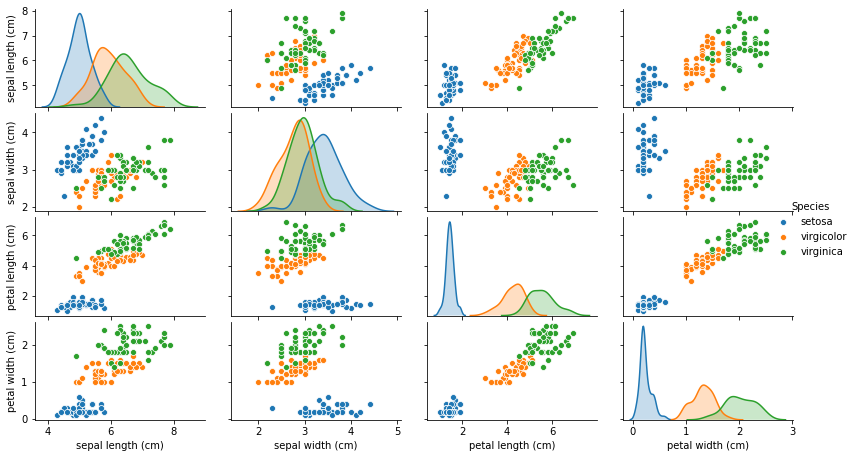

In [74]:
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline


# 縦軸と横軸に特徴量を１つずつ取り、種類毎に色分けした散布図行列を作る。
# 4種類の特徴量を用いるため、4×4の構成になる。
# それを3品種ごと引数hueを用いて、色分けして作成する。

pg = sns.pairplot(df, hue='Species')

pg.fig.set_size_inches((12, 6))
lg = pg.fig.legends[0]
lg.texts[0].set_text('setosa')
lg.texts[1].set_text('virgicolor')
lg.texts[2].set_text('virginica')

pg

<AxesSubplot:>

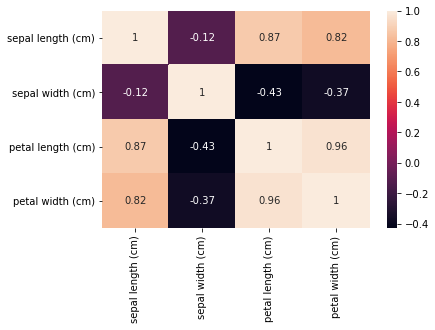

In [80]:
from matplotlib import pyplot as plt
import seaborn as sns

# 相関係数行列のヒートマップを作る。

# データセットから4要素のみ"X"をcorr()メソッドを用い、相関行列化する。
df_corr = X.corr()

# df_corrを用い、ヒートマップ化する。
sns.heatmap(df_corr, annot=True)

## 【問題8】可視化したグラフや表の結果の説明

データを探索した時には、結果を述べる（+考察する）ことが大切です。ここまでで作成した表や図から読み取れることや気づきを説明してください。

## 【考察】

萼の厚みが、setosaが一際大きく、花弁の長さが一際短い。